In [1]:
import pandas as pd 
import sklearn 
import numpy as np
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt 

In [2]:
#this data set contains marketing cost in radio, newspaper ,TV and sales  
df = pd.read_csv('Advertising.txt',index_col=0)

In [41]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [42]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [43]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


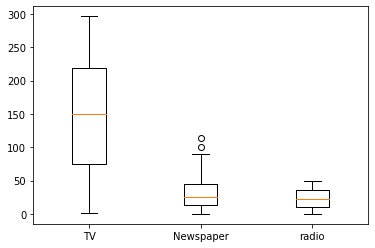

In [23]:
plt.boxplot([df.TV, df.newspaper, df.radio], labels=['TV', 'Newspaper', 'radio'])
plt.show()

In [3]:
print(df.newspaper.quantile(0.10))
df.newspaper.quantile(0.90)

5.99


59.06999999999999

In [4]:
df.newspaper = np.where(df.newspaper<5.99, 5.99, df.newspaper )
df.newspaper = np.where(df.newspaper>59.069, 59.069, df.newspaper )

In [5]:
print(df.newspaper.quantile(0.10))
df.newspaper.quantile(0.90)

5.999


59.0069

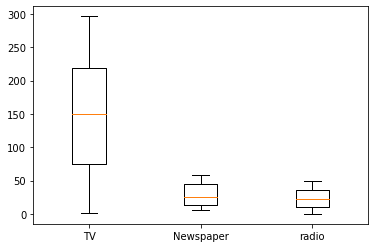

In [6]:
plt.boxplot([df.TV, df.newspaper, df.radio], labels=['TV', 'Newspaper', 'radio'])
plt.show()

In [48]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.065441,0.782224
radio,0.054809,1.000000,0.358668,0.576223
newspaper,0.065441,0.358668,1.000000,0.246812
sales,0.782224,0.576223,0.246812,1.000000


In [69]:
x=df[['TV','radio','newspaper']]
y=df[['sales']

In [70]:
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.2)

In [71]:
model = LinearRegression()
model.fit(x_train,y_train)
accuracy = model.score(x_test,y_test)

In [72]:
print(accuracy)#this is r^2 

0.9038525358974759


In [73]:
print("intercept: ",model.intercept_)
print("slope: ",model.coef_)

intercept:  [2.6730778]
slope:  [[0.0465615  0.18291705 0.00583124]]


In [75]:
a=np.array([44.5,39.3,45.1]).reshape(1,-1)

In [76]:
model.predict(a)

array([[12.19669359]])